## Optimal path

In this notebook, a problem in which the optimal path to reach an end-node will be solved, using Q-Learning a RL algorithm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# R matrix
R = np.array([[-100, -100, -100, -100, -5, -100],
              [-100, -100, -100, -5, -100, 20],
              [-100, -100, -100, -5, -100, -100],
              [-100, -5, -5, -100, -5, -100],
              [-5, -100, -100, -5, -100, 20],
              [-100, -5, -100, -100, -5, 20]])

# Q-matrix
Q = np.zeros((6,6))

### Hyperparameters

In [3]:
# It is common to leave Hyperparameters in ALL CAPS to easily locate them

EPOCHS=200000  
ALPHA = 0.95
GAMMA = 0.8

In [4]:
# Exploration vs. Exploitation parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.001            # Exponential decay rate for exploration prob

### Associated functions

In [5]:
def action_selection(epsilon, q_table, r_table, discrete_state):

    random_number = np.random.random()
    
    # EXPLOITATION, USE BEST Q(s,a) Value
    if random_number > epsilon:
        # Action row for a particular state
        state_row = q_table[discrete_state,:]

        # Index of highest action for state
        action = np.argmax(state_row)

        # Associated reward
        reward = R[discrete_state, action]

    
    # EXPLORATION, USE A RANDOM ACTION
    else:
        action = random.randint(0, 5)
        reward = R[discrete_state, action]
        
    return action, reward

In [6]:
def next_optimal_q_value(q_table, discrete_state):

    state_row = q_table[discrete_state,:]
    act = np.argmax(state_row)

    next_max_q = q_table[discrete_state, act]

    return next_max_q

In [7]:
def reinforcement_learning(epsilon, alpha, gamma, state, Q, R):

    path = [state]

    if state == 5:
        score = 20
    else:
        score = 0
    
    while state != 5:
        action, reward = action_selection(epsilon, Q, R, state)
        score += reward

        next_opt_q = next_optimal_q_value(Q, action)                     
        Q[state, action] = (1 - alpha)*Q[state, action] + alpha*(reward + gamma*next_opt_q)

        state = action
        path.append(state)
    
    return score, path

In [8]:
def reduce_epsilon(epsilon,epoch):
    
    return min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*epoch)

### Training loop

In [9]:
score = []
path = []


for i in range(EPOCHS):
    current_state = np.random.randint(0, int(Q.shape[0]))
    run = reinforcement_learning(epsilon, ALPHA, GAMMA, current_state, Q, R)
    epsilon = reduce_epsilon(epsilon, i + 1) 

    given_score = run[0]
    used_path = run[1]
    score.append(given_score)
    path.append(used_path)

In [10]:
Q

array([[ -91.2 ,  -84.  ,  -96.96,  -91.2 ,   11.  , -100.  ],
       [ -91.2 ,  -84.  ,  -96.96,    3.8 ,  -84.  ,   20.  ],
       [ -91.2 ,  -84.  ,  -96.96,    3.8 ,  -84.  , -100.  ],
       [ -91.2 ,   11.  ,   -1.96,  -91.2 ,   11.  , -100.  ],
       [   3.8 ,  -84.  ,  -96.96,    3.8 ,  -84.  ,   20.  ],
       [   0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ]])

Text(0, 0.5, 'Score')

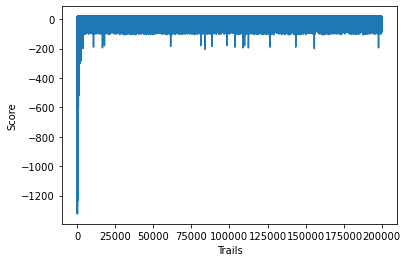

In [11]:
plt.plot(np.linspace(0, len(score), len(score)), score)
plt.xlabel("Trails")
plt.ylabel("Score")

### Test loop

In [12]:
for i in range(6):
    res = reinforcement_learning(epsilon, ALPHA, GAMMA, i, Q, R)
    print(res)

(15, [0, 4, 5])
(20, [1, 5])
(10, [2, 3, 1, 5])
(15, [3, 1, 5])
(20, [4, 5])
(20, [5])
